# Challenge 4 and Simulations Practice #

## Estimate earnings exercise

Task: Write a function `simulateEarnings(distUnitP, distUnitS, distFixedC, distVariableC, n)`, where `n` is the number of scenarios to be explored.

1. Generate triangular distributions (each of the parameters is distribution) for:
- `unitPrice`
- `unitSales`
- `fixedCosts`
- `variableCosts`

2. Calculate the earnings by taking random numbers from these distributions and plugging them into the formula:

```
earningsestimated = unitPrice * unitSales − varCosts − fixedCosts
```

3. Plot the distribution of earnings, to give us a good idea of what to expect


In [2]:
import numpy as np  
import matplotlib.pyplot as plt   

Distribution : 
 [8.30193766 2.17923573 1.83314837 ... 3.10929198 3.392559   8.53408134]


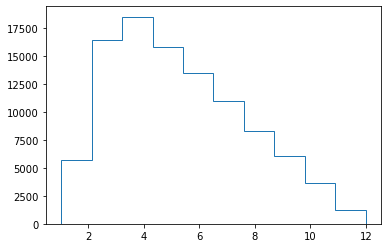

In [3]:
# step 1: generate a triangular distributions
#       np.random.triangular(minValue, peakValue, maxValue, distSize)
distribution = np.random.triangular(1, 3, 12, 100000)
print("Distribution : \n", distribution) 
     
plot = plt.hist(distribution, histtype='step') 
plt.show()

# next generate distributions for each:

# unitPrice
# unitSales
# fixedCosts
# variableCosts

In [4]:
'''
The exercise doesn't set the limits (max, min, peak) for the distributions. So we can choose it ourselves.
I'm also defining how many scenarios we will be simulating `iterations`
'''
iterations = 100000
# unitPrice
distUnitPrice = np.random.triangular(20, 25, 35, iterations)
# plt.hist(distUnitPrice, histtype='step') 
# unitSales
distUnitSales = np.random.triangular(0, 10, 200, iterations)
# plt.hist(distUnitSales, histtype='step') 
# fixedCosts
distFixedCosts = np.random.triangular(1, 5, 7, iterations)
# plt.hist(distFixedCosts, histtype='step') 
# variableCosts
distVariableCosts = np.random.triangular(0, 3, 11, iterations)
# plt.hist(distVariableCosts, histtype='step') 

# next step calculate earnings in the simulation

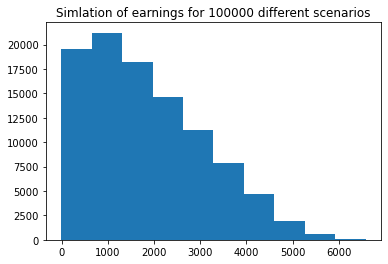

In [5]:
def simulateEarnings(distUnitP, distUnitS, distFixedC, distVariableC, n):
#     store each result per scenario
    resultingSimulationEarnings = []
#     generating n scenarios
    for scenario in range(n):
#         determining this scenario's values
        unitPrice = distUnitP[scenario]
        unitSales = distUnitS[scenario] 
        fixedCosts = distFixedC[scenario] 
        varCosts = distVariableC[scenario]        
#         calculating earnings estimation based on formula
        earningsestimated = unitPrice * unitSales - varCosts - fixedCosts
#         saving this scenario's result
        resultingSimulationEarnings.append(earningsestimated)
#     Next step: plot the results from all simulations
    plt.hist(resultingSimulationEarnings) 
    plt.title("Simlation of earnings for "+str(n)+" different scenarios")
    
# Testing the function using the distributions we create in the cell above
simulateEarnings(distUnitPrice, distUnitSales, distFixedCosts, distVariableCosts, iterations)

## Radiation Levels Simulation

Task: write a function `radiationSimulation(water, wprob, surface, sprob)`, where:
- `water`: is the level of the water radiation in the region affected
- `wprob`: the probability of the level of the water radiation going down 1 point
- `surface`: is the level of the surface radiation in the region affected
- `sprob`: the probability of the level of the surface radiation going down 1 point

Your function will:
1. Simulate the levels of radiation going down every year until the region is safe.
    - The region is safe when the water levels are under 4 points and the surface levels are under 8 points.

2. Return the number of years it took until the region was safe.

3. Plot the water and surface levels over the years.



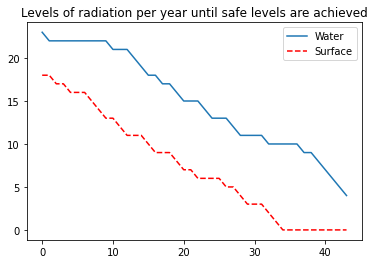

Years until safe again:  44


In [33]:

def radiationSimulation(water, wprob, surface, sprob):
#     we will use this to save the levels at each year
    wovertime = []
    sovertime = []
#     while level are unsafe, it only stops when it's safe for both water and surface
    while (water>4 or surface>8):
#         it doesn't go under 0
        if water!=0:
#           Did the water radiation level decrease this year?
            if np.random.rand() < wprob:
                water = water - 1
#         it doesn't go under 0
        if surface!=0:
#           Did the surface radiation level decrease this year?
            if np.random.rand() < sprob:
                surface = surface - 1
            
#       saving the hitory data of the level per year
        wovertime.append(water)
        sovertime.append(surface)
        
#   plotting levels of water and surface decrease, this shows how many years it will take to be safe again
    p1 = plt.plot(range(len(wovertime)), wovertime)
    p2 = plt.plot(range(len(sovertime)), sovertime,  "r--")    
    plt.legend((p1[0],p2[0]), ('Water','Surface'))
    plt.title("Levels of radiation per year until safe levels are achieved")
    plt.show()
#     return the number of years it took to be safe again
    return len(wovertime)
        
    
#  testing the function   
print('Years until safe again: ', radiationSimulation(23, 0.4, 19, 0.6))